In [1]:
from src.constants import *
from src.utils.configuration import ConfigurationManager
from steps.train_model import train_model
import matplotlib.pyplot as plt
import tensorflow as tf
from steps.ingest_data import ingestion
from steps.inference import inference
from pipelines.data_pipeline import data_pipeline
import numpy as np
import pandas as pd
import seaborn as sns
import shap
shap.initjs()

2025-06-12 03:39:01 | INFO | Loading settings from the ZenML secret store.
2025-06-12 03:39:03 | WARNING | Failed to load settings from the ZenML secret store. Defaulting to loading the settings from the '.env' file.


In [2]:
config = ConfigurationManager()
data_config = config.get_data_ingestion_config()
data_preprocess_config = config.get_data_preprocess_config()
data_inngestion_config = config.get_data_ingestion_config()

{'data_ingestion': {'data_source': 'data/chestxray', 'cache_dir': 'data/hf_cache'}, 'data_processing': {'batch_size': 16, 'normalize': True, 'augment': False, 'image_size': [256, 256], 'augmentation_config': {'featurewise_center': False, 'samplewise_center': False, 'featurewise_std_normalization': False, 'samplewise_std_normalization': False, 'zca_whitening': False, 'rotation_range': 30, 'zoom_range': 0.2, 'width_shift_range': 0.1, 'height_shift_range': 0.1, 'horizontal_flip': True, 'vertical_flip': False}}}
2025-06-12 03:39:23 | INFO | yaml file: C:\Users\souss\Desktop\DE\xaipneumonia\config\config.yaml loaded successfully
2025-06-12 03:39:23 | INFO | created directory at: data/hf_cache
2025-06-12 03:39:23 | INFO | created directory at: data/hf_cache


In [3]:
train_dir, val_dir, test_dir = ingestion(data_inngestion_config)

2025-06-12 03:39:23 | INFO | Data ingested successfully
2025-06-12 03:39:23 | INFO | Data ingested successfully
2025-06-12 03:39:23 | INFO | Train directory: C:\Users\souss\Desktop\DE\xaipneumonia\data\chestxray\train
2025-06-12 03:39:23 | INFO | Validation directory: C:\Users\souss\Desktop\DE\xaipneumonia\data\chestxray\val
2025-06-12 03:39:23 | INFO | Test directory: C:\Users\souss\Desktop\DE\xaipneumonia\data\chestxray\test


In [4]:
train_ds, val_ds, test_ds, index_to_class = data_pipeline(
    ingestion_config=data_inngestion_config,
    data_preprocess_config=data_preprocess_config,
)

2025-06-12 03:39:23 | INFO | Data ingested successfully
2025-06-12 03:39:23 | INFO | Data ingested successfully
2025-06-12 03:39:23 | INFO | Train directory: C:\Users\souss\Desktop\DE\xaipneumonia\data\chestxray\train
2025-06-12 03:39:23 | INFO | Validation directory: C:\Users\souss\Desktop\DE\xaipneumonia\data\chestxray\val
2025-06-12 03:39:23 | INFO | Test directory: C:\Users\souss\Desktop\DE\xaipneumonia\data\chestxray\test
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
2025-06-12 03:39:23 | INFO | Classes détectées: ['NORMAL', 'PNEUMONIA']
2025-06-12 03:39:23 | INFO | Mapping classe (0/1): {0: 'NORMAL', 1: 'PNEUMONIA'}
2025-06-12 03:39:23 | INFO | Prétraitement terminé avec succès.
2025-06-12 03:39:23 | INFO | Data pipeline completed successfully.


In [5]:
model = tf.keras.models.load_model("../models/my_model_2.keras")
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,912,069 (56.89 MB)

 Trainable params: 65,793 (257.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 131,588 (514.02 KB)

In [6]:
def binary_predict(self, images):
    """Wrapper function to format predictions for binary classification"""
    if isinstance(images, list):
        images = np.array(images)
    
    # Convert to float32 if needed and normalize
    if images.dtype != np.float32:
        images = images.astype(np.float32) / 255.0
        
    preds = self.model.predict(images, verbose=0)
    
    return np.hstack([1-preds, preds])

In [7]:
def get_sample(generator, sample_size=100):
    images = []
    labels = []
    while len(images) < sample_size:
        x_batch, y_batch = next(generator)
        for x, y in zip(x_batch, y_batch):
            images.append(x)
            labels.append(y)
            if len(images) >= sample_size:
                break
    return np.array(images), np.array(labels)


<Axes: xlabel='label'>

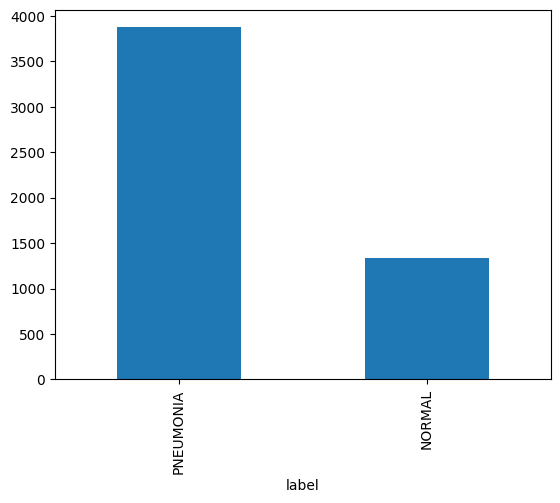

In [8]:
pd.Series(train_ds.labels, name="label").map(index_to_class).value_counts().plot(kind="bar")

In [9]:
X_bg_large, y_bg_large = get_sample(train_ds, sample_size=200)


In [12]:
#y_bg_large = y_bg_large.astype("int")
#majority_class = np.bincount(y_bg_large).argmax()
#bg_mask = y_bg_large == majority_class
X_bg = X_bg_large[:100]

In [13]:
#np.sum(bg_mask)

In [14]:
X_test_sample, y_test_sample = get_sample(test_ds, sample_size=3)

In [15]:
model2 = tf.keras.models.Model(
            inputs=model.inputs,
            outputs=model.output
        )


In [16]:
model2.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,780,481 (56.38 MB)

 Trainable params: 65,793 (257.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [17]:
shap_explainer = shap.GradientExplainer(model2, X_bg)

In [18]:
shap_values = shap_explainer.shap_values(X_test_sample)

In [19]:
shap_values

array([[[[[ 5.32373952e-06],
          [-9.58034980e-06],
          [ 7.28386840e-06]],

         [[ 2.97456845e-05],
          [ 6.59566467e-06],
          [ 3.55440461e-05]],

         [[ 5.22923765e-05],
          [ 2.69496413e-05],
          [ 6.27038462e-05]],

         ...,

         [[ 9.62088143e-06],
          [ 2.53654525e-05],
          [ 2.25760468e-05]],

         [[ 9.35461139e-06],
          [ 1.44235200e-05],
          [ 1.60257532e-05]],

         [[-3.22134565e-06],
          [ 3.47639883e-07],
          [ 3.52848360e-07]]],


        [[[-2.83706249e-05],
          [-6.59071084e-05],
          [-3.19719074e-05]],

         [[-7.95259166e-06],
          [-6.77135540e-05],
          [-9.98229734e-06]],

         [[ 1.13464205e-06],
          [-6.55147524e-05],
          [ 3.58198963e-06]],

         ...,

         [[ 1.47617322e-06],
          [ 2.51164038e-05],
          [ 1.83719603e-05]],

         [[ 3.00682814e-06],
          [ 1.90568608e-05],
          [ 1.567612

In [20]:
print("shape of shap values:", shap_values.shape)
shap_values = np.squeeze(shap_values, axis=-1)
print("shape of shap values after squeeze:", shap_values.shape)

shape of shap values: (3, 256, 256, 3, 1)
shape of shap values after squeeze: (3, 256, 256, 3)


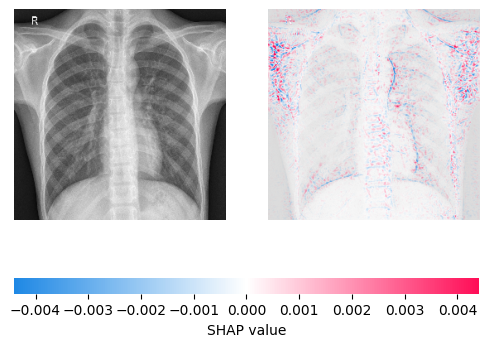

In [21]:
shap.image_plot(
    shap_values[2],
    X_test_sample[2],
    show=True
)

In [22]:
import numpy as np
import shap
import tensorflow as tf
from src.base.xai_entity import ImageExplainer
from steps.preprocess_input import preprocess_input


class GradientSHAPExplainer(ImageExplainer):
    def __init__(self, model, background_data, input_shape=(256, 256, 3), class_names=['PNEUMONIA', 'NORMAL']):
        super().__init__(model)
        self.input_shape = input_shape
        self.class_names = class_names

        # Convert background data to normalized float32 if needed
        if background_data.dtype != np.float32:
            background_data = background_data.astype(np.float32) / 255.0

        # Take a small representative sample for the background
        self.background = background_data[:100]  # shape: (100, H, W, C)

        self.explainer = shap.GradientExplainer(self.model, self.background)

    def explain(self, image_path_or_array, nsamples=50):
        # Load and preprocess image
        if isinstance(image_path_or_array, str):
            image = preprocess_input(image_path_or_array)[0]
        elif isinstance(image_path_or_array, np.ndarray):
            image = image_path_or_array
        else:
            raise ValueError("image_path_or_array must be a path or numpy array")

        if image.dtype != np.float32:
            image = image.astype(np.float32) / 255.0

        image_batch = np.expand_dims(image, axis=0)

        # Compute SHAP values
        shap_values = self.explainer.shap_values(image_batch, nsamples=nsamples)
        
        # For binary classification with sigmoid, shap_values is a list with 1 element
        if isinstance(shap_values, list) and len(shap_values) == 1:
            shap_values = shap_values[0]  
            
        pred_score = self.model.predict(image_batch, verbose=0)
        pred_class = self.class_names[int(pred_score[0][0] > 0.5)]

        return {
            "original_image": (image * 255).astype(np.uint8),
            "pred_score": pred_score,
            "shap_values": shap_values,
            "predicted_class": pred_class
        }


In [23]:
gradient_shap_explainer = GradientSHAPExplainer(
    model=model2,
    background_data=X_bg_large,
    input_shape=(256, 256, 3),
    class_names=list(index_to_class.values())
)


In [24]:
result = gradient_shap_explainer.explain(X_test_sample[0])


c:\Users\souss\AppData\Local\pypoetry\Cache\virtualenvs\src-9pV2zt4C-py3.11\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_image']
Received: inputs=Tensor(shape=(1, 256, 256, 3))
  warnings.warn(msg)


In [25]:
result["shap_values"].shape

(1, 256, 256, 3, 1)

In [26]:
result["original_image"].shape

(256, 256, 3)

In [27]:
np.squeeze(result["shap_values"], axis=-1)[0].shape

(256, 256, 3)

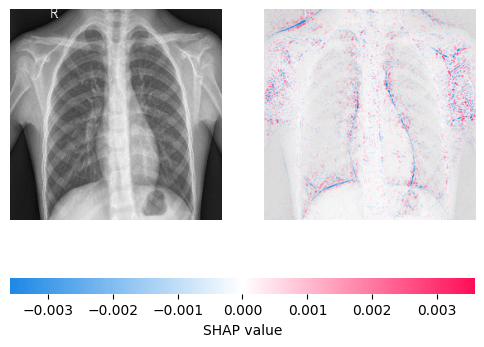

In [28]:
shap.image_plot(
    np.squeeze(result["shap_values"], axis=-1)[0],
    result["original_image"],
    show=True
)

In [50]:
result["shap_values"].shape

(1, 256, 256, 3, 1)

In [56]:
from src.utils.plots import plotly_shap_image

In [55]:
fig = plotly_shap_image(
    shap_values=np.squeeze(result["shap_values"], axis=-1),
    pixel_values=np.expand_dims(result["original_image"], axis=0),

    cmap="RdBu",
    opacity=0.6
)
fig

C:\Users\souss\AppData\Local\Temp\ipykernel_18420\887912174.py:48: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



In [ ]:
model2.layers

[<InputLayer name=input_image, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <MaxPooling2D name=block5_pool, built=True>,
 <GlobalAveragePooling2D name=global_average_pooling2d, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [58]:
def get_conv2d_layer_names(model):
    conv_layer_names = []

    def collect_conv_layers(m):
        for layer in m.layers:
            if isinstance(layer, tf.keras.layers.Conv2D):
                conv_layer_names.append(layer.name)
            elif isinstance(layer, tf.keras.models.Model):
                collect_conv_layers(layer)

    collect_conv_layers(model)
    return conv_layer_names

# Exemple d'utilisation
conv_names = get_conv2d_layer_names(model)
print(conv_names)

['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']
